### Data Set:
We will make use of vehicle.csv data set The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### Objective:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. How will we meet our bjective? We will Apply dimensionality reduction technique - PCA and train a model using the reduced set of principal components (Attributes/dimension). Then we will build Support Vector Classifier on raw data and also on PCA components to see how the model perform on the reduced set of dimension. We will also print the confusion matrix for both the scenario and see how our model has performed in classifying various vehicle types based on given silhouette of vehicles.



### Importing the libraries

In [2]:
%matplotlib inline

import warnings

# Numerical libraries
import numpy as np  

# to handle data in form of rows and columns 
import pandas as pd  

# preprocessing
from sklearn.preprocessing import StandardScaler


#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report,roc_auc_score

# importing ploting libraries
import matplotlib.pyplot as plt  

#importing seaborn for statistical plots
import seaborn as sns

# Label encoder 
from sklearn.preprocessing import LabelEncoder

# Support Vector Classifier
from sklearn.svm import SVC

# PCA Related
from sklearn.decomposition import PCA

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Cross Validation related
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Loading and Checking the Dataset

In [3]:
VehicleData = pd.read_csv("vehicle.csv")

In [4]:
VehicleData.head(50)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   
20           84         47.0                  75.0         153.0   
21           84         37.0                  53.0         121.0   
22           94         43.0                  64.0         173.0   
23           87         39.0                  70.0         148.0   
24           99         53.0                 105.0         219.0   
25           85         45.0                  80.0         154.0   
26           83         36.0                  54.0         119.0   
27          107         54.0                  98.0         203.0   
28          102         45.0                  85.0         193.0   
29           80         38.0                  63.0         129.0   
30           89         43.0                  85.0         160.0   
31           88         42.0                  77.0         151.0   
32           93         35.0                  66.0         154.0   
33          101         48.0                 107.0         222.0   
34           87         38.0                  85.0         177.0   
35          100         46.0                   NaN         172.0   
36           82         44.0                  72.0         118.0   
37           90         48.0                  86.0         306.0   
38          106         53.0                  98.0         176.0   
39           81         45.0                  68.0         169.0   
40           95         48.0                 104.0         214.0   
41           88         37.0                  51.0         105.0   
42           94         49.0                  87.0         137.0   
43           93         37.0                  76.0         183.0   
44          119         54.0                 106.0         220.0   
45           93         46.0                  82.0         145.0   
46           91         43.0                  70.0         133.0   
47           85         42.0                  66.0         122.0   
48           89         47.0                  81.0         147.0   
49           91         45.0                  79.0         176.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          

In [5]:
VehicleData.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [6]:
VehicleData[~VehicleData.applymap(np.isreal).all(1)] , VehicleData.shape

(     compactness  circularity  distance_circularity  radius_ratio  \
 0             95         48.0                  83.0         178.0   
 1             91         41.0                  84.0         141.0   
 2            104         50.0                 106.0         209.0   
 3             93         41.0                  82.0         159.0   
 4             85         44.0                  70.0         205.0   
 ..           ...          ...                   ...           ...   
 841           93         39.0                  87.0         183.0   
 842           89         46.0                  84.0         163.0   
 843          106         54.0                 101.0         222.0   
 844           86         36.0                  78.0         146.0   
 845           85         36.0                  66.0         123.0   
 
      pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
 0                    72.0                       10          162.0   
 1                

### Performing EDA:
Finding Any Missing Value

Finding Outliers

Understanding attributes using descriptive statistics

visualizing attribute distribution using univariate and multivariate analysis

Finding attribute correlation and analysing which attribute is more important

#### Quick Eyeballing To See if there is any missing values

In [7]:
VehicleData.shape

(846, 19)

In [8]:
VehicleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### All fields are numeric except class- no need to convert data types
#### There are missing values in many columns like circularity, distance circularity, radius ratio .. etc

In [9]:
VehicleData['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

#### Cars are almost double in number as compared to bus and van. van is least in number

In [10]:
labelencoder = LabelEncoder()
VehicleData['class'] = labelencoder.fit_transform(VehicleData['class'])
VehicleData['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

#### Finding The Missing Value

Let's find the count of each attribite & treat the missing values

In [11]:
from sklearn.impute import SimpleImputer

newdf = VehicleData.copy()

X = newdf.iloc[:,0:19] #separting all numercial independent attribute
#y = vehdf.iloc[:,18] #seprarting class attribute. 
#imputer = SimpleImputer()
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe()

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.977541  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [12]:
print("Original null value count:", VehicleData.isnull().sum())
print("\n\nCount after we impiuted the NaN value: ", newdf.isnull().sum())

Original null value count: compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


Count after we impiuted the NaN value:  compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity     

#### Observation:
If you carefully observe the above, our orginal dataframe "VehicleData" and new dataframe "newdf" , we will find that , After we imputed the datfarme series , using simpleimputer, we can see that the missing NaN values from our orginal datframe columns are treated and replaced using mode strategy.

### Understanding each attributes :
Univariate Analysis

Quick descriptive statistics to make some meaningful sense of data

Plotting univariate distribution

Finding outliers & skewness in data series.

Treating outliers

Text(0.5, 1.0, 'Box Plot')

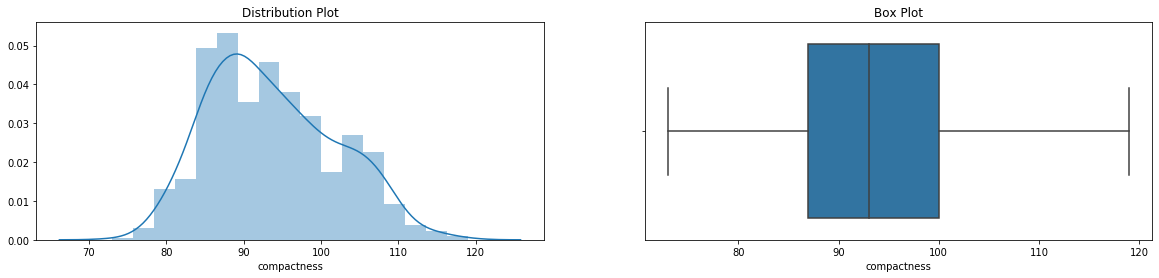

In [13]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['compactness'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in compactness column and it looks like normally distributed.

Text(0.5, 1.0, 'Box Plot')

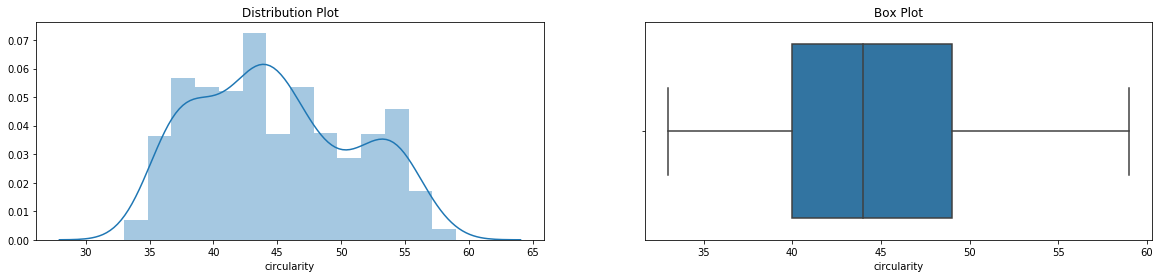

In [14]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in circularity column and it looks like normally distributed.

Text(0.5, 1.0, 'Box Plot')

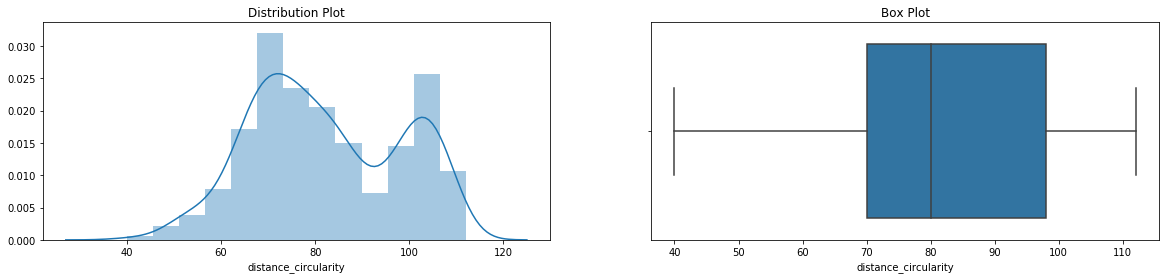

In [16]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

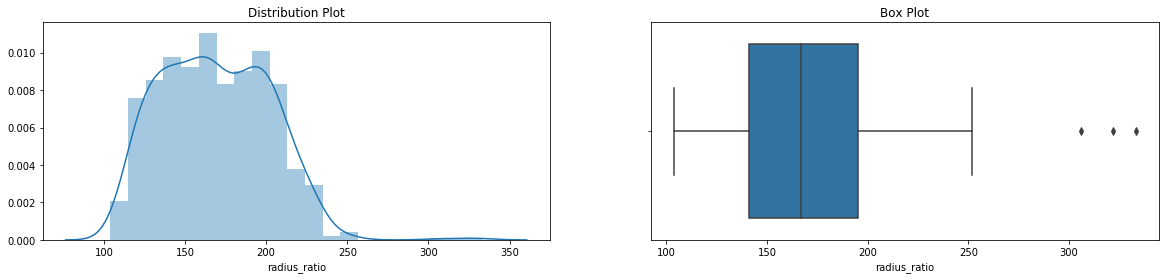

In [17]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in radius_ratio column and there is right skewness because long tail is at the right side(mean>median)

In [19]:
#check how many outliers are there in radius_ratio column
q1 = np.quantile(newdf['radius_ratio'],0.25)
q2 = np.quantile(newdf['radius_ratio'],0.50)
q3 = np.quantile(newdf['radius_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("radius_ratio above",newdf['radius_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in radius_ratio column are",newdf[newdf['radius_ratio']>276]['radius_ratio'].shape[0])

Quartie1:: 141.0
Quartie2:: 167.0
Quartie3:: 195.0
Inter Quartie Range:: 54.0
radius_ratio above 276.0 are outliers
The Outliers in radius_ratio column are 3


Text(0.5, 1.0, 'Box Plot')

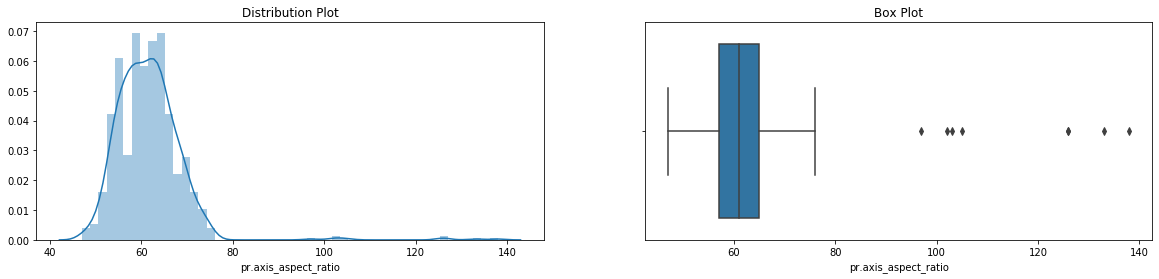

In [20]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in pr.axis_aspect_ratio column and there is right skewness because long tail is at right side(mean>median)

In [21]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(newdf['pr.axis_aspect_ratio'],0.25)
q2 = np.quantile(newdf['pr.axis_aspect_ratio'],0.50)
q3 = np.quantile(newdf['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("pr.axis_aspect_ratio above",newdf['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in pr.axis_aspect_ratio column are",newdf[newdf['pr.axis_aspect_ratio']>77]['pr.axis_aspect_ratio'].shape[0])

Quartie1:: 57.0
Quartie2:: 61.0
Quartie3:: 65.0
Inter Quartie Range:: 8.0
pr.axis_aspect_ratio above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 8


Text(0.5, 1.0, 'Box Plot')

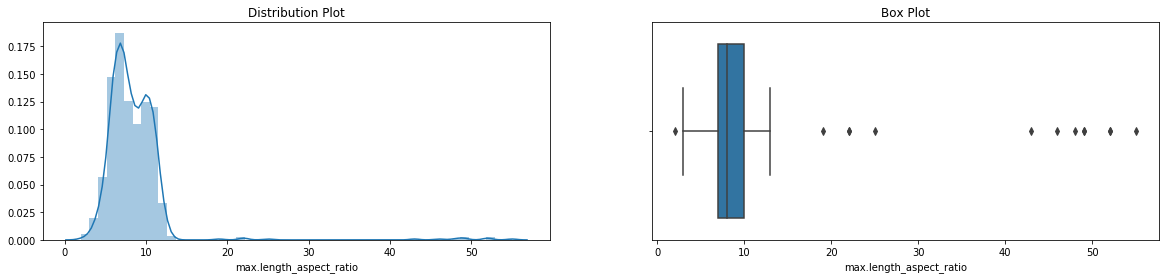

In [22]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in max.length_aspect_ratio and there is a right skewness because long tail is at right side(mean>median)

In [24]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(newdf['max.length_aspect_ratio'],0.25)
q2 = np.quantile(newdf['max.length_aspect_ratio'],0.50)
q3 = np.quantile(newdf['max.length_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("max.length_aspect_ratio above",newdf['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("max.length_aspect_ratio below",newdf['max.length_aspect_ratio'].quantile(0.25)-(1.5 * IQR),"are outliers")
print("The above Outliers in max.length_aspect_ratio column are",newdf[newdf['max.length_aspect_ratio']>14.5]['max.length_aspect_ratio'].shape[0])
print("The below Outliers in max.length_aspect_ratio column are",newdf[newdf['max.length_aspect_ratio']<2.5]['max.length_aspect_ratio'].shape[0])

Quartie1:: 7.0
Quartie2:: 8.0
Quartie3:: 10.0
Inter Quartie Range:: 3.0
max.length_aspect_ratio above 14.5 are outliers
max.length_aspect_ratio below 2.5 are outliers
The above Outliers in max.length_aspect_ratio column are 12
The below Outliers in max.length_aspect_ratio column are 1


Text(0.5, 1.0, 'Box Plot')

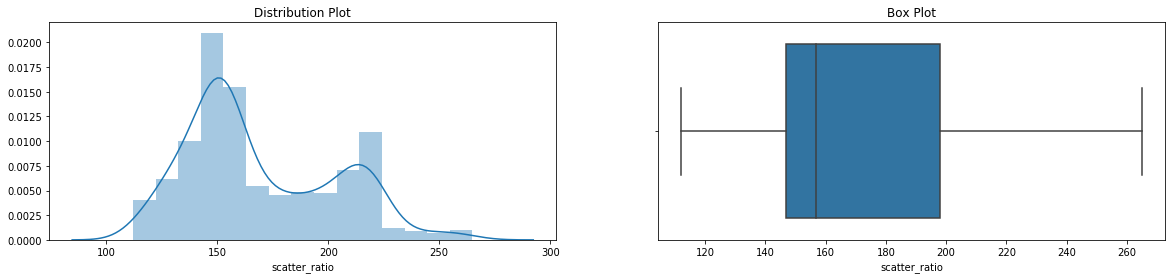

In [25]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

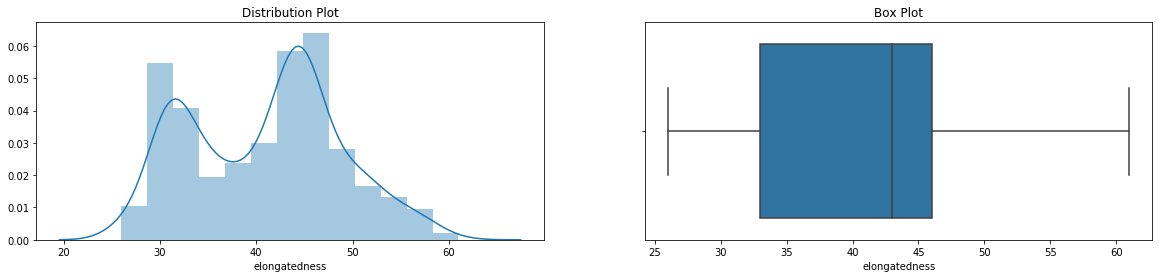

In [26]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in elongatedness column and there are two peaks in distribution plot and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

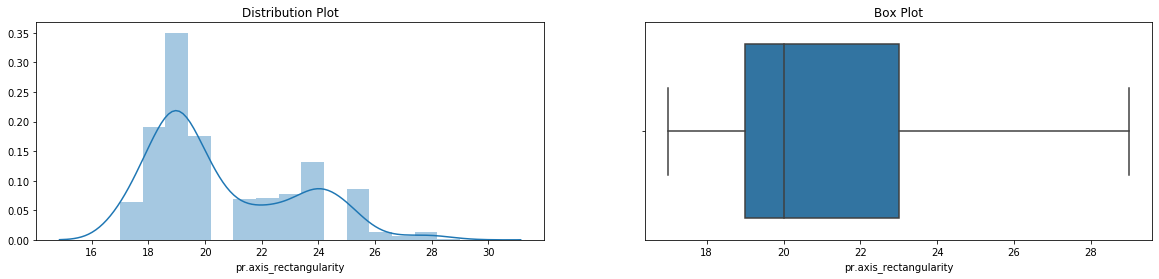

In [27]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

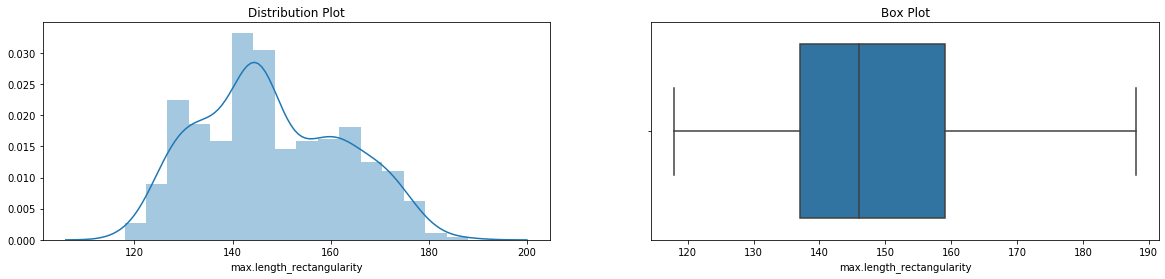

In [28]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

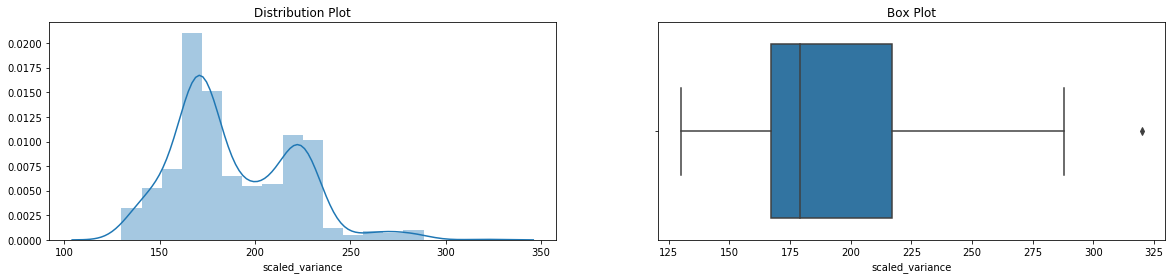

In [29]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [30]:
#check how many outliers are there in scaled_variance column
q1 = np.quantile(newdf['scaled_variance'],0.25)
q2 = np.quantile(newdf['scaled_variance'],0.50)
q3 = np.quantile(newdf['scaled_variance'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance above",newdf['scaled_variance'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance column are",newdf[newdf['scaled_variance']>292]['scaled_variance'].shape[0])

Quartie1:: 167.0
Quartie2:: 179.0
Quartie3:: 217.0
Inter Quartie Range:: 50.0
scaled_variance above 292.0 are outliers
The Outliers in scaled_variance column are 1


Text(0.5, 1.0, 'Box Plot')

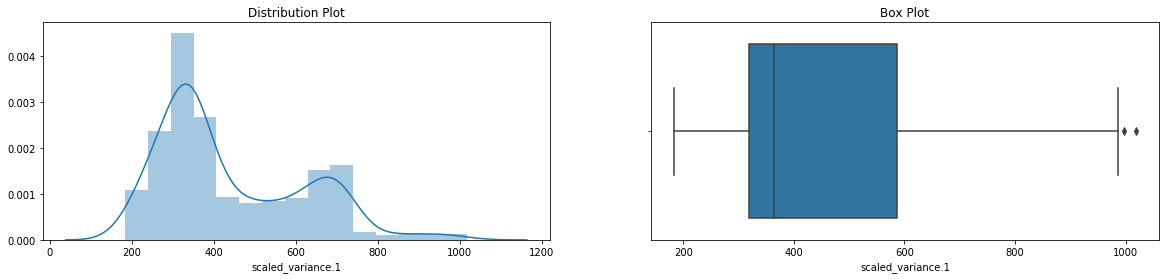

In [31]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [32]:
#check how many outliers are there in scaled_variance.1 column
q1 = np.quantile(newdf['scaled_variance.1'],0.25)
q2 = np.quantile(newdf['scaled_variance.1'],0.50)
q3 = np.quantile(newdf['scaled_variance.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance.1 above",newdf['scaled_variance.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance.1 column are",newdf[newdf['scaled_variance.1']>988]['scaled_variance.1'].shape[0])

Quartie1:: 318.25
Quartie2:: 363.5
Quartie3:: 586.75
Inter Quartie Range:: 268.5
scaled_variance.1 above 989.5 are outliers
The Outliers in scaled_variance.1 column are 2


Text(0.5, 1.0, 'Box Plot')

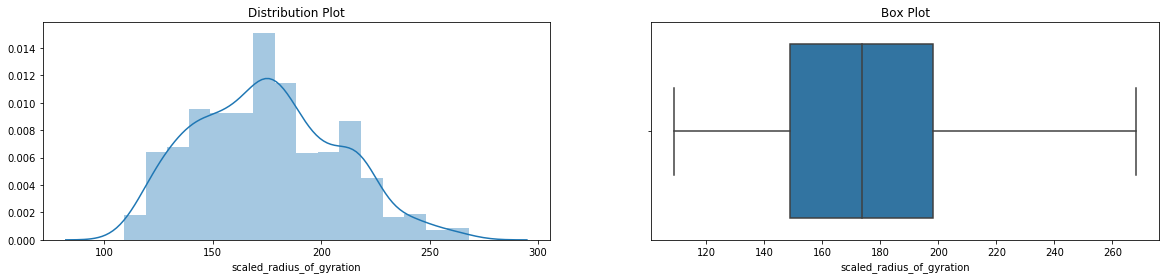

In [33]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

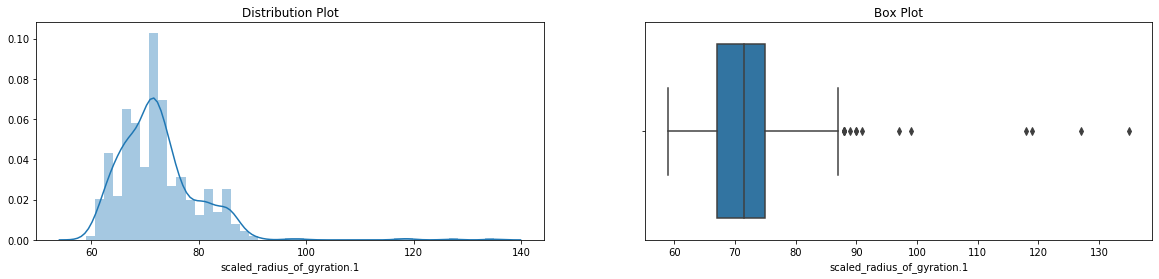

In [35]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side(mean>median)

In [36]:
#check how many outliers are there in scaled_radius_of_gyration.1 column
q1 = np.quantile(newdf['scaled_radius_of_gyration.1'],0.25)
q2 = np.quantile(newdf['scaled_radius_of_gyration.1'],0.50)
q3 = np.quantile(newdf['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_radius_of_gyration.1 above",newdf['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_radius_of_gyration.1 column are",newdf[newdf['scaled_radius_of_gyration.1']>87]['scaled_radius_of_gyration.1'].shape[0])

Quartie1:: 67.0
Quartie2:: 71.5
Quartie3:: 75.0
Inter Quartie Range:: 8.0
scaled_radius_of_gyration.1 above 87.0 are outliers
The Outliers in scaled_radius_of_gyration.1 column are 15


Text(0.5, 1.0, 'Box Plot')

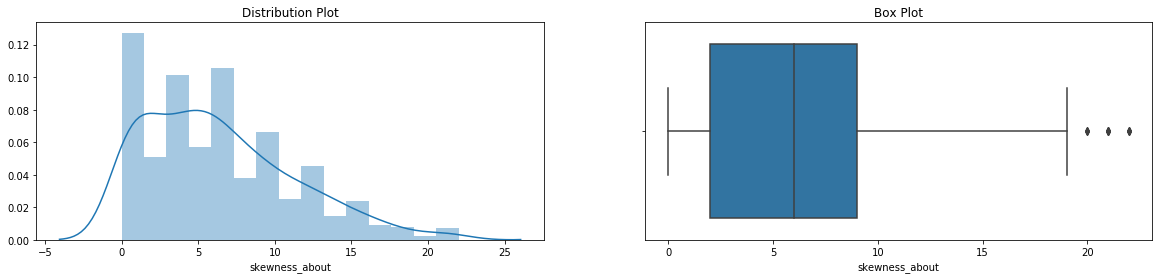

In [37]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in skewness_about column and there is right skewness because long tail is at right side(mean>median)

In [38]:
#check how many outliers are there in skewness_about.1 column
q1 = np.quantile(newdf['skewness_about.1'],0.25)
q2 = np.quantile(newdf['skewness_about.1'],0.50)
q3 = np.quantile(newdf['skewness_about.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about.1 above",newdf['skewness_about.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about.1 column are",newdf[newdf['skewness_about.1']>38.5]['skewness_about.1'].shape[0])

Quartie1:: 5.0
Quartie2:: 11.0
Quartie3:: 19.0
Inter Quartie Range:: 14.0
skewness_about.1 above 40.0 are outliers
The Outliers in skewness_about.1 column are 3


Text(0.5, 1.0, 'Box Plot')

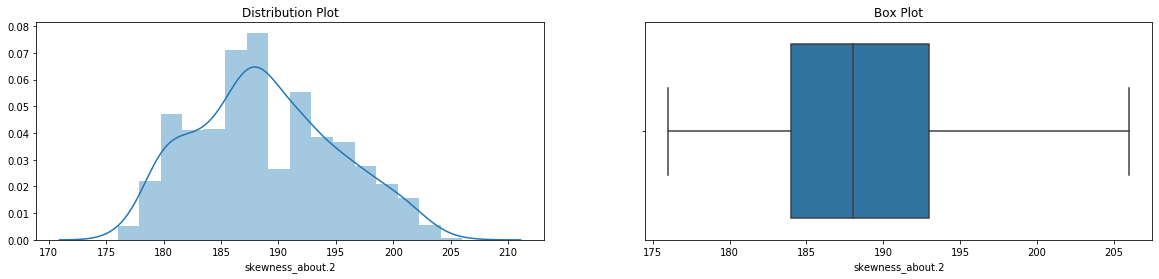

In [39]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in skewness_about.2 column and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

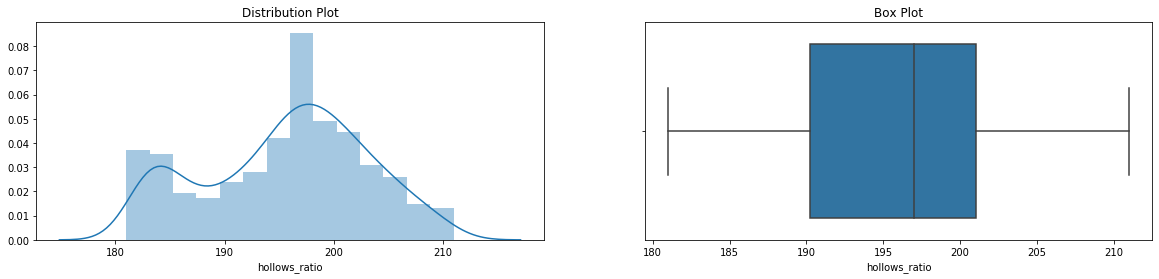

In [40]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(newdf['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(newdf['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in hollows_ratio column and there is left skewness because long tail is at left side(mean<median)

From above we can see that we have 8 columns in which we found outliers:

 ->radius_ratio 
 
 ->pr.axis_aspect_ratio
 
 ->max.length_aspect_ratio
 
 ->scaled_variance
 
 ->scaled_variance.1
 
 ->scaled_radius_of_gyration.1
 
 ->skewness_about
 
 ->skewness_about.1

#### Fix Outliers after dropping missing values

In [41]:
#radius_ratio column outliers
newdf.drop(newdf[newdf['radius_ratio']>276].index,axis=0,inplace=True)

In [42]:
#pr.axis_aspect_ratio column outliers
newdf.drop(newdf[newdf['pr.axis_aspect_ratio']>77].index,axis=0,inplace=True)

In [43]:
#max.length_aspect_ratio column outliers
newdf.drop(newdf[newdf['max.length_aspect_ratio']>14.5].index,axis=0,inplace=True)
newdf.drop(newdf[newdf['max.length_aspect_ratio']<2.5].index,axis=0,inplace=True)

In [44]:
#scaled_variance column outliers
newdf[newdf['scaled_variance']>292]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

From above we can see that scaled_variance column outliers has been removed

In [45]:
#scaled_variance.1 column outliers
newdf.drop(newdf[newdf['scaled_variance.1']>988].index,axis=0,inplace=True)

In [46]:
#scaled_radius_of_gyration.1 column outliers
newdf.drop(newdf[newdf['scaled_radius_of_gyration.1']>87].index,axis=0,inplace=True)

In [47]:
#skewness_about column outliers
newdf.drop(newdf[newdf['skewness_about']>19.5].index,axis=0,inplace=True)
#skewness_about.1 column outliers
newdf.drop(newdf[newdf['skewness_about.1']>38.5].index,axis=0,inplace=True)

In [48]:
#now what is the shape of dataframe
print("after removing outliers shape of dataframe:",newdf.shape)

after removing outliers shape of dataframe: (811, 19)


#### Let's Plot The Box Plot Once Agaian To See if outliers are removed

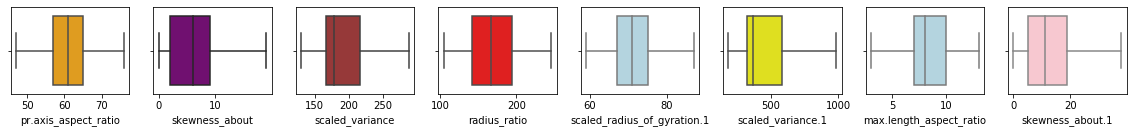

In [49]:
plt.figure(figsize= (20,15))
plt.subplot(8,8,1)
sns.boxplot(x= newdf['pr.axis_aspect_ratio'], color='orange')

plt.subplot(8,8,2)
sns.boxplot(x= newdf.skewness_about, color='purple')

plt.subplot(8,8,3)
sns.boxplot(x= newdf.scaled_variance, color='brown')
plt.subplot(8,8,4)
sns.boxplot(x= newdf['radius_ratio'], color='red')

plt.subplot(8,8,5)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(8,8,6)
sns.boxplot(x= newdf['scaled_variance.1'], color='yellow')

plt.subplot(8,8,7)
sns.boxplot(x= newdf['max.length_aspect_ratio'], color='lightblue')

plt.subplot(8,8,8)
sns.boxplot(x= newdf['skewness_about.1'], color='pink')

plt.show()

#### Understanding the relationship between all independent attribute:
We will be using data correlation:

Data Correlation: Is a way to understand the relationship between multiple variables and attributes in your dataset. Using Correlation, you can get some insights such as:

One or multiple attributes depend on another attribute or a cause for another attribute. One or multiple attributes are associated with other attributes. Spearman and Pearson are two statistical methods to calculate the strength of correlation between two variables or attributes. Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship.

#### Pearson Correlation Coefficient:
We will use Pearson Correlation Coefficient to see what all attributes are linearly related and also visualize the same in the seaborns scatter plot.

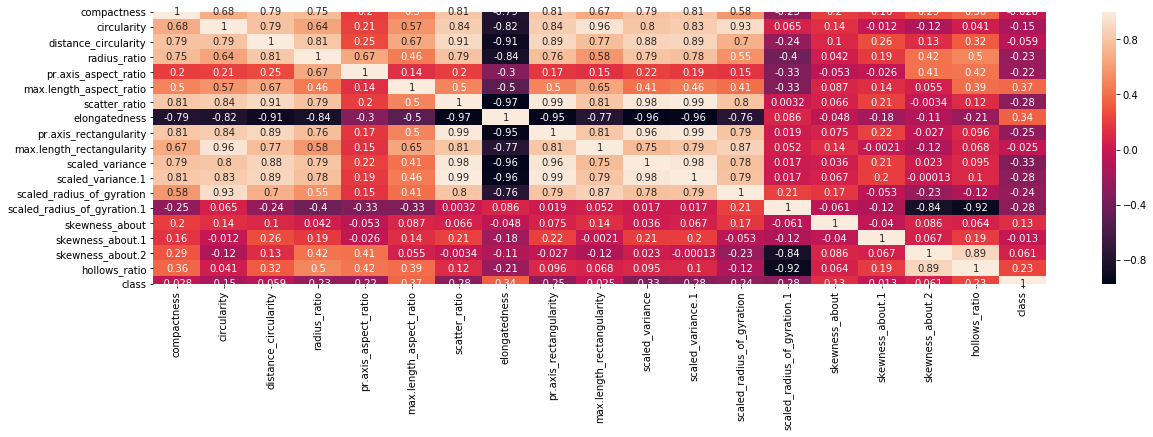

In [50]:
#find the correlation between independent variables
plt.figure(figsize=(20,5))
sns.heatmap(newdf.corr(),annot=True)
plt.show()

#### Pairplot Analysis:

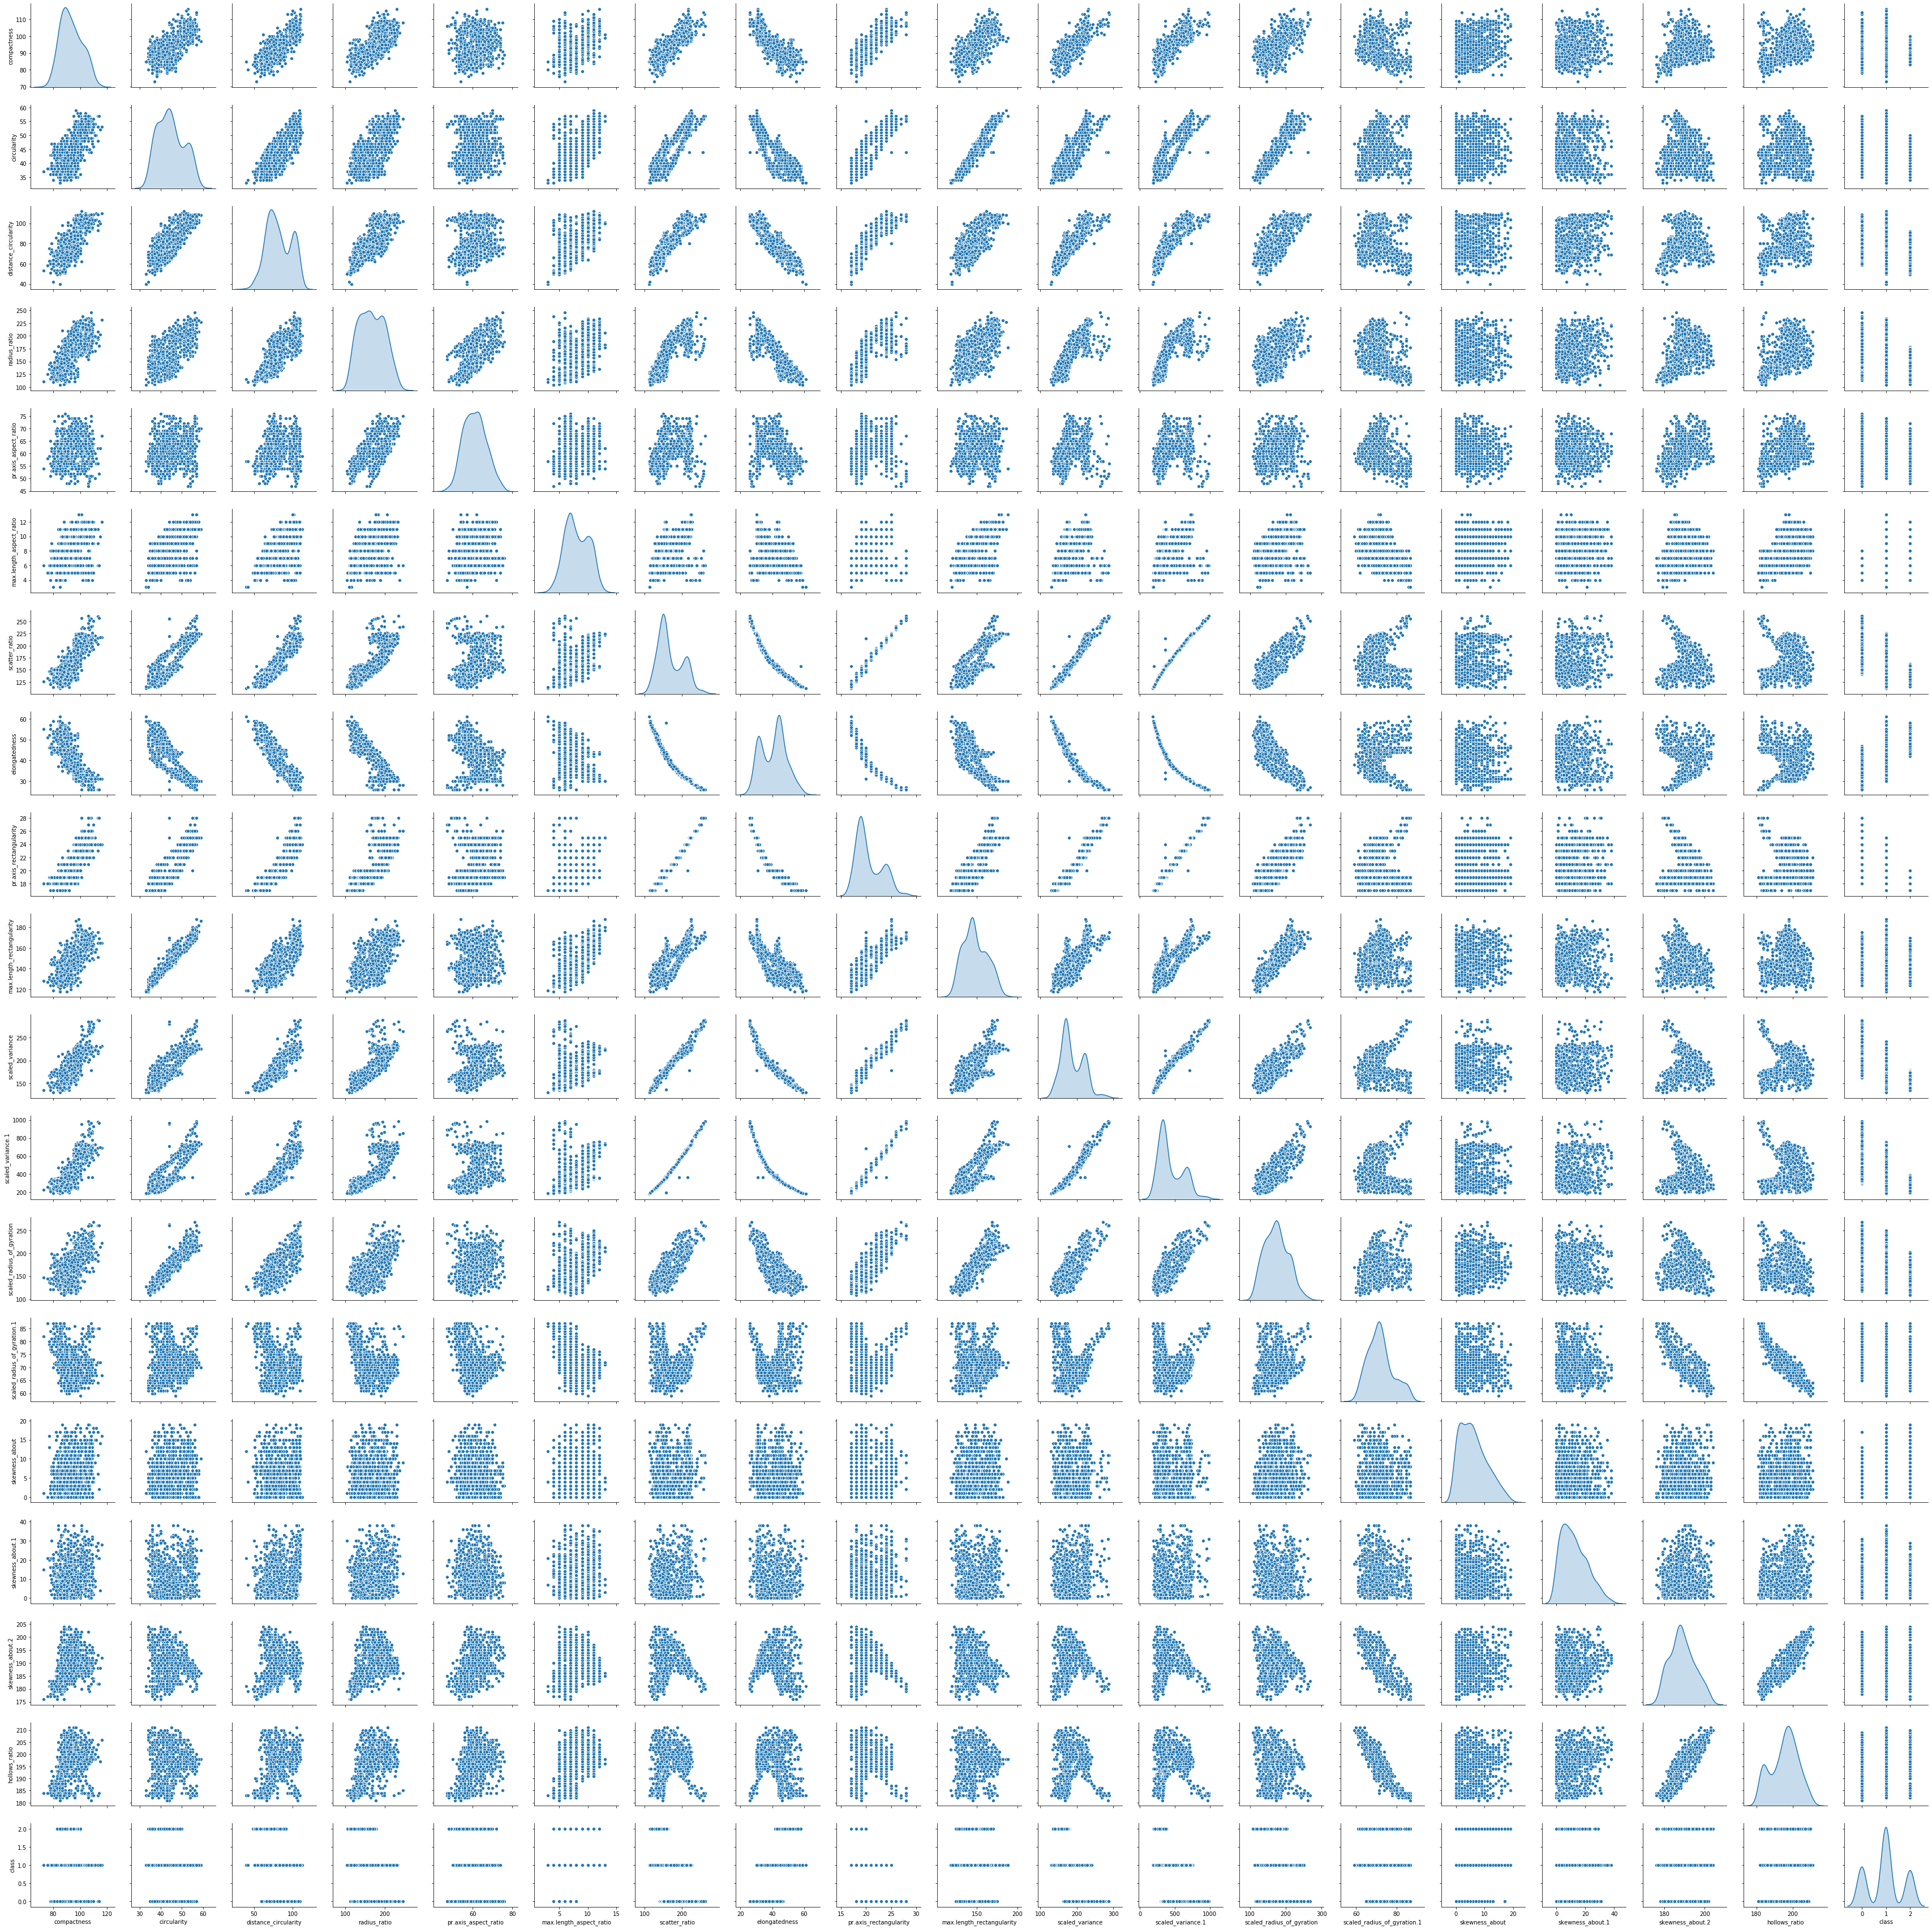

In [51]:
sns.pairplot(newdf, diag_kind="kde")

#### Inferences:

The Data has normal distribution

Spread of compactness is least for van. mean compactness is highest for car. For Bus compactness is right skewed indicating that less number of buses have high compactness.

Mean circularity is higher for cars

Mean distance_circularity is also higher for cars

Mean radius_ratio is higher for cars, followed by Bus. It is least for vans

pr.axis_aspect_ratio is has almost same distribution for car, van and buses

max.length_aspect_ratio is almost same for cars and vans, lower for buses

Mean scatter ratio is highest for cars, followed by bus and van

Mean elomngatedness is highest for vans folowed by bus and car

pr.axis_rectangularity is highest for cars, followed by bus and then vans

distribution of max.length_rectangularity is almost same for cars, bus and vans

Mean scaled variance is highest for cars followed by bus then vans

Mean scaled variance1 is highest for cars followed by bus then vans

'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', have almost similar distribution for cars, buses and vans.

'hollows_ratio' is lower for buses as compared to cars and vans

Many columns have lonmg tails indicating outliers

pr.axis_aspect ratio and radius ratio varies strongly +ve for van, for cars and buses it varies in small range- mostly cpuld like

Scatter ratio & Scaled_variance1 has almost perfect positive linear relationship

Many features show high correlation indicating that we need to drop multiple features- we will use PCA for the same

### Principal Component Analysis(PCA):

- Basically PCA is a dimension redcuction methodology which aims to reduce a large set of (often correlated) variables into a smaller set of (uncorrelated) variables, called principal components, which holds sufficient information without loosing the the relevant info much.

 - Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

#### We will perform PCA in following steps:
Split our data into train and test data set

normalize the tarining set using standard scalar

Calculate the covariance matrix.

Calculate the eigenvectors and their eigenvalues.

Sort the eigenvectors according to their eigenvalues in descending order.

Choose the first K eigenvectors (where k is the dimension we'd like to end up with).

Build new dataset with reduced dimensionality.

#### Separate The Data Into Independent & Dependent attribute

In [53]:
V1 = newdf.iloc[:,0:18].values
V2 = newdf.iloc[:,18].values

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
V1_std =  sc.fit_transform(V1)

#### Covariance Matrix

In [55]:
cov_mat = np.cov(V1_std.T)
print("cov_matrix shape:",cov_mat.shape)
print("Covariance_matrix",cov_mat)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00123457e+00  6.81021348e-01  7.87567084e-01  7.46739467e-01
   2.02667690e-01  4.96910623e-01  8.11519195e-01 -7.89160164e-01
   8.12497603e-01  6.75215645e-01  7.92165006e-01  8.13241942e-01
   5.80558866e-01 -2.52950585e-01  2.04004652e-01  1.57033969e-01
   2.95315433e-01  3.63195045e-01]
 [ 6.81021348e-01  1.00123457e+00  7.87775334e-01  6.42287935e-01
   2.07328034e-01  5.65826467e-01  8.45219307e-01 -8.17177356e-01
   8.41755038e-01  9.62403809e-01  8.04025056e-01  8.33793911e-01
   9.26476108e-01  6.53708439e-02  1.41637535e-01 -1.21850508e-02
  -1.15848786e-01  4.08520347e-02]
 [ 7.87567084e-01  7.87775334e-01  1.00123457e+00  8.09663237e-01
   2.47748521e-01  6.69423983e-01  9.06506118e-01 -9.09723978e-01
   8.95758190e-01  7.69289235e-01  8.85092496e-01  8.89041311e-01
   7.04492965e-01 -2.38782315e-01  1.01647926e-01  2.64186032e-01
   1.29482158e-01  3.22325259e-01]
 [ 7.46739467e-01  6.42287935e-01  8.09663237e-01  1.00123

#### Calculating Eigen Vectors & Eigen Values: 

In [56]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72160716e-01 -8.92646595e-02 -3.21020160e-02 -1.28197049e-01
   1.51130275e-01 -2.59740704e-01  1.88896208e-01  7.72179312e-01
  -3.60101046e-01 -1.25282147e-01  3.01689889e-02  1.07169427e-02
   3.04709280e-04  1.03810587e-02 -1.00830269e-01 -1.46807342e-01
  -4.39850533e-03  2.70861972e-03]
 [-2.85497824e-01  1.31960985e-01 -2.10506735e-01  3.69332694e-02
  -1.34289379e-01  7.28381256e-02 -3.90957462e-01  6.63213996e-02
  -4.61044043e-02  2.40536024e-01  7.20474437e-02  7.63516569e-03
   1.93378950e-01 -8.54867639e-02 -3.13200334e-01  1.93668015e-01
  -2.89476051e-01  5.87776301e-01]
 [-3.01429004e-01 -4.43027811e-02  6.43087468e-02 -1.12965314e-01
  -8.38403671e-02  1.93635504e-02  1.75734043e-01 -2.96357465e-01
  -2.61598891e-01 -9.31293462e-02  7.78276314e-01 -1.16683025e-02
  -2.36551068e-01  2.56578726e-02  5.96839422e-02  5.62978422e-02
   9.98955691e-02  8.87917908e-02]
 [-2.72571451e-01 -2.04602330e-01  6.24179575e-02  2.46306974e-01
   1.20913549e-01  

#### Sort eigenvalues in descending order

In [57]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.795482601554049, array([-0.27216072, -0.28549782, -0.301429  , -0.27257145, -0.09910203,
       -0.19454334, -0.31045258,  0.30836929, -0.30748129, -0.27627875,
       -0.30267007, -0.30696707, -0.26199439,  0.04353601, -0.03751075,
       -0.05851297, -0.03481313, -0.08265761])), (3.374054056969281, array([-0.08926466,  0.13196099, -0.04430278, -0.20460233, -0.26091456,
       -0.09384887,  0.07284049, -0.01192482,  0.08479258,  0.12510155,
        0.07063616,  0.07835672,  0.20833569,  0.50409453, -0.01619854,
       -0.0881636 , -0.50207753, -0.50681335])), (1.2044119428579638, array([-0.03210202, -0.21050674,  0.06430875,  0.06241796, -0.0643605 ,
       -0.16974406,  0.1134063 , -0.09591838,  0.1092658 , -0.22813661,
        0.15044507,  0.11666934, -0.20679538,  0.07636095, -0.54265213,
        0.66550282, -0.05520917, -0.04866836])), (1.135220149997986, array([-0.12819705,  0.03693327, -0.11296531,  0.24630697,  0.60625199,
       -0.30539703,  0.0020037 , -0.07309427, -0.02

In [58]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

#### Plotting The Explained Variance and Principal Components: Elbow Plot

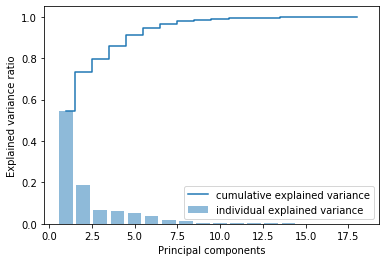

In [59]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

#### Quick Observation:
From above we plot we can clealry observer that 8 dimension() are able to explain 95 %variance of data.
so we will use first 8 principal components going forward and calulate the reduced dimensions.
#### Dimensionality Reduction
Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!

In [61]:
V1_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

V1_std_8Dim = np.dot(V1_std,V1_reduce.T)   # projecting original data into principal component dimensions

red_pca = pd.DataFrame(V1_std_8Dim)  # converting array to dataframe for pairplot

red_pca

0         1         2         3         4         5         6  \
0   -0.595633 -0.664203 -0.502325  0.688077 -0.834930  1.848647 -0.151805   
1    1.521011 -0.331622 -0.338058 -1.277561 -0.293856  0.088685  0.208946   
2   -3.975095  0.227430 -1.213059 -0.113596  0.933472  0.651559  0.828977   
3    1.546791 -3.045704 -0.487313 -0.362097 -0.622620 -0.379673  0.129208   
4   -5.471830  4.651371  1.274831 -0.108955  1.660905 -2.533166  0.309633   
..        ...       ...       ...       ...       ...       ...       ...   
806  0.364532 -0.639496  1.504806 -0.296992  0.749983  0.923061  0.876318   
807  0.037680 -0.163260  0.477863  0.152743 -1.981173  1.437813 -0.278323   
808 -5.191179 -0.181854 -0.544171  0.943966 -1.335044 -0.224385  0.887685   
809  3.318949 -1.089653  1.916143 -0.482995 -0.562978  0.023738 -0.269953   
810  5.009965  0.434882  1.298827 -0.288787 -0.189006 -0.349481 -0.411648   

            7  
0    0.684327  
1   -0.124732  
2   -0.165713  
3    0.179241  
4   -0.476250  
..        ...  
806 -0.188444  
807  0.308039  
808  0.426574  
809 -0.439387  
810  0.228550  

[811 rows x 8 columns]

#### Let us check The Pairplot Of Reduced Dimension After PCA:

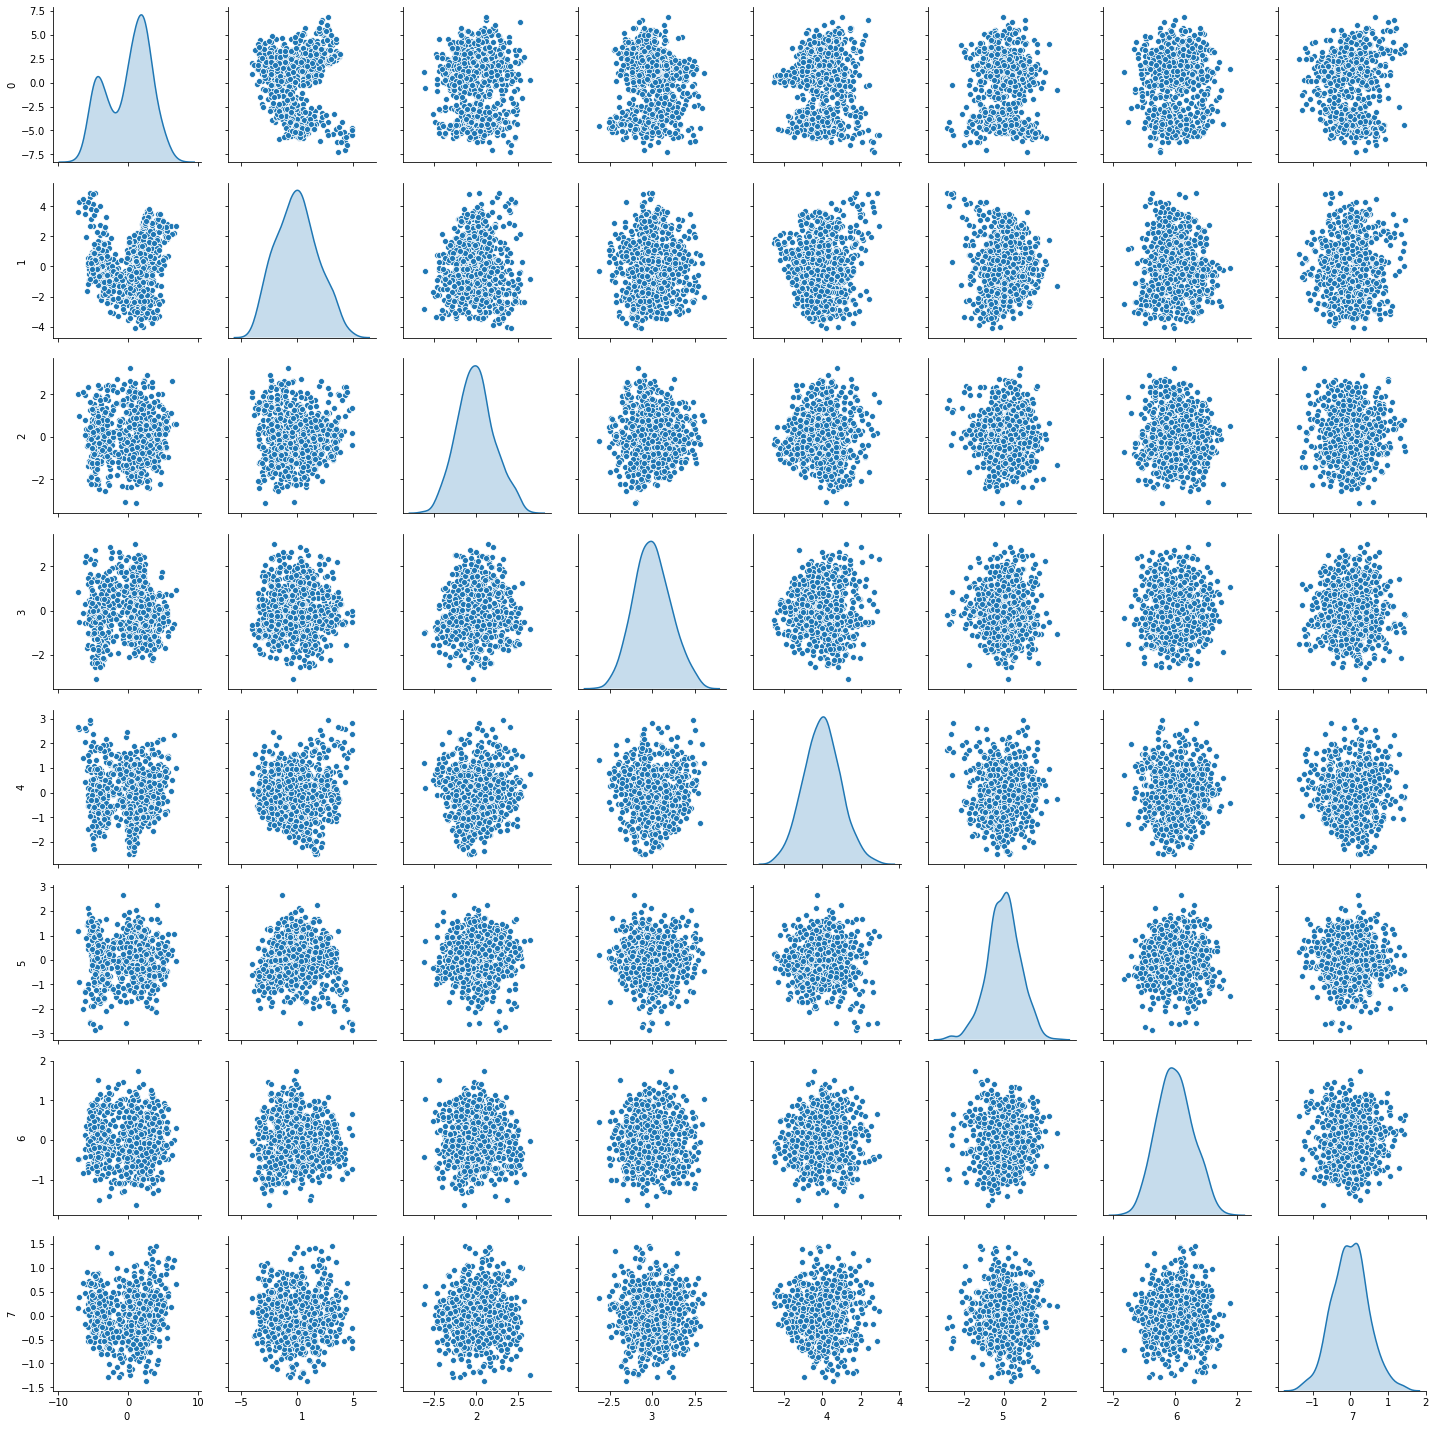

In [63]:
sns.pairplot(red_pca, diag_kind='kde') 
#sns.pairplot(red_pca1, diag_kind='kde') 

After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves

#### Splitting and Fitting SVC on PCA and Orignial data

In [64]:
# Splitting original and PCA data with a 70:30 ratio
#orginal Data
V_X_train,V_X_test,V_y_train,V_y_test = train_test_split(V1_std,V2,test_size=0.30,random_state=1)

#PCA Data
P_X_train,P_X_test,P_y_train,P_y_test = train_test_split(red_pca,V2,test_size=0.30,random_state=1)

In [65]:
s=SVC()

In [66]:
s.fit(V_X_train, V_y_train)

C:\Users\prono\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [67]:
V_y_predict = s.predict(V_X_test)

In [68]:
s1 = SVC()

In [69]:
s1.fit(P_X_train,P_y_train)

C:\Users\prono\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
P_y_predict = s1.predict(P_X_test)

In [71]:
#display accuracy score of both models

print("Model Score On Original Data ",s.score(V_X_test, V_y_test))
print("Model Score On Reduced PCA Dimension ",s1.score(P_X_test, P_y_test))

print("Before PCA On Original 18 Dimension",accuracy_score(V_y_test,V_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(P_y_test,P_y_predict))

Model Score On Original Data  0.9713114754098361
Model Score On Reduced PCA Dimension  0.9385245901639344
Before PCA On Original 18 Dimension 0.9713114754098361
After PCA(On 8 dimension) 0.9385245901639344


#### Observation
On training data set our support vector classifier without performing PCA has an accuracy score of 97 %

When we apply the SVC model on PCA componenets(reduced dimensions) our model scored 93 %

Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model is better in terms of accuracy score.

### Confusion Matrix

Confusion Matrix For : 
 Original Data Set [[ 64   0   0]
 [  1 118   3]
 [  1   2  55]]


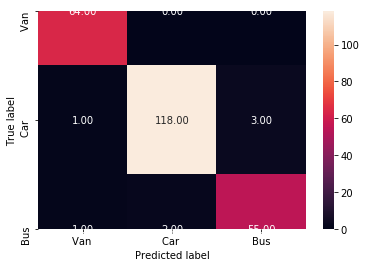

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 62   2   0]
 [  2 117   3]
 [  1   7  50]]


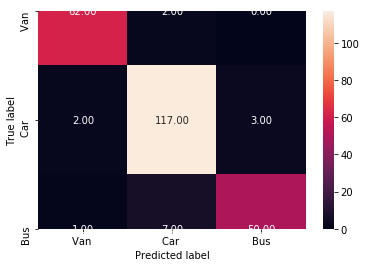

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        64
         1.0       0.98      0.97      0.98       122
         2.0       0.95      0.95      0.95        58

    accuracy                           0.97       244
   macro avg       0.97      0.97      0.97       244
weighted avg       0.97      0.97      0.97       244

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        64
         1.0       0.93      0.96      0.94       122
         2.0       0.94      0.86      0.90        58

    accuracy                           0.94       244
   macro avg       0.94      0.93      0.94       244
weighted avg       0.94      0.94      0.94       244



In [72]:
def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

draw_confmatrix(V_y_test, V_y_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(P_y_test, P_y_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")

#Classification Report Of Model built on Raw Data

print("Classification Report For Raw Data:", "\n", classification_report(V_y_test,V_y_predict))

#Classification Report Of Model built on Principal Components:

print("Classification Report For PCA:","\n", classification_report(P_y_test,P_y_predict))

#### Confusion Matrix Analysis on Original and PCA Data:
##### Confusion Matrix For : Original Data Set [[ 64 0 0] [ 1 118 3] [ 1 2 55]]
1) Our model on original data set has correctly classified 64 van out of 64 actuals vans.

2) In case of 122 actual cars our svm model has correcly classified 118 cars. it has wrongly classified 3 cars to be a bus and also 1 car to be a van

3) In case of 58 instances of actual bus , our model has correctly classified 55 buses , It has faltered in classifying wrongly 2 buses to be a van and 1 bus to be a car.

##### Confusion Matrix For : Reduced Dimensions using PCA [[ 62 2 0] [ 2 117 3] [ 2 7 50]]
1) Out of 64 actual instances of vans our model has correctly predicted 62 vans and errored in 2 instances where it wrongly classified vans to be a car.

2) Out of 122 actuals cars , our mdoel has correclty classified 117 of them to be a car and faltered in 5 cases where it wrongly classified 3 cars to a bus and 2 cars to be a van.

3) Out of 58 actual bus , our model has correclty classified 50 of them to be a bus. It has faltered in 9 cases where it wrongly classified 7 bus to be a car and 2 bus to be a van.

#### Classification Reports Analysis
##### On Original Data
1) Model has 98 % precison score when it comes to classify car from the given set of silhoutte parameters.

2) It has 97 % precision when it comes to classifying the input as van, while it has 95 % precison when it come to predict data as bus.

3) In term of recall score the model has recal score of 100 % for van classification, 97 % for car and 95 % for bus.

4) The model has an weighted average of 97 % for all classification metrics.

##### On Reduced Dimensions using PCA
1) The model has highest precision score of 94 % when it comes to predict van and bus type.

2) The model has a weighted average of 94% for all classification metrics

### Applying Grid Search and Cross Validation for Model Tuning

In [73]:
import itertools

def classifiers_hypertune(name,rf,param_grid,x_train_scaled,y_train,x_test_scaled,y_test,CV):
    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train_scaled, y_train)
    
    y_pred_train = CV_rf.predict(x_train_scaled)
    y_pred_test = CV_rf.predict(x_test_scaled)
    
    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)
    
    
    
    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))
    
   
    #Confusion Matrix for test data
    draw_confmatrix(y_test, y_pred_test,"Van", "Car", "Bus", "Original Data Set" )
    print("SVM Accuracy Score:",round(accuracy_score(y_test, y_pred_test),2)*100)

In [74]:
#Training on SVM Classifier
from sklearn.model_selection import GridSearchCV
svmc = SVC()

#Let's See What all parameters one can tweak 
print("SVM Parameters:", svmc.get_params())

# Create the parameter grid based on the results of random search 
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]

param_grid_1 = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

SVM Parameters: {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#### Fitting SVC ON PCA Data:

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.9s finished
C:\Users\prono\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\prono\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best Score:  0.9576719576719577
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        64
         1.0       0.93      0.96      0.94       122
         2.0       0.94      0.86      0.90        58

    accuracy                           0.94       244
   macro avg       0.94      0.93      0.94       244
weighted avg       0.94      0.94      0.94       244

Confusion Matrix For : 
 Original Data Set [[ 62   2   0]
 [  2 117   3]
 [  1   7  50]]


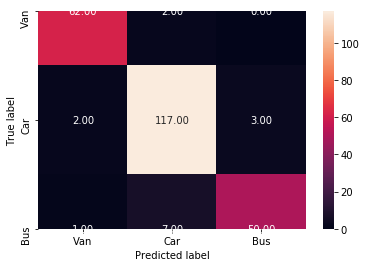

SVM Accuracy Score: 94.0


In [75]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,P_X_train, P_y_train, P_X_test, P_y_test,10)

#### Fitting SVC ON Original Data:

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.9664902998236331
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        64
         1.0       0.98      0.97      0.98       122
         2.0       0.95      0.95      0.95        58

    accuracy                           0.97       244
   macro avg       0.97      0.97      0.97       244
weighted avg       0.97      0.97      0.97       244

Confusion Matrix For : 
 Original Data Set [[ 64   0   0]
 [  1 118   3]
 [  1   2  55]]


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
C:\Users\prono\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


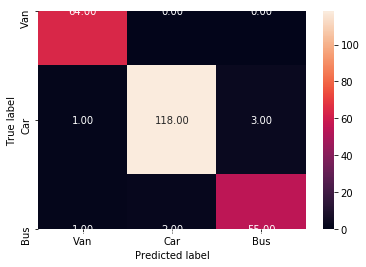

SVM Accuracy Score: 97.0


In [76]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,V_X_train, V_y_train, V_X_test, V_y_test,10)

#### We can see a slight improvement in best model which was picked by our Gridsearch Cross Validation method: 96.64 % and  we also saw a slight increase in model accuracy score : 97 %

### Closing Comments:

- We have seen how Principal component analysis can help us cherry pick only the relevant features by analysing the relationship between independent attributes to see which one will be more helpful in building our model without introducing any impurity in it. 

- It is recommended to split your data set into test-train before you apply data normalization. This will help our model to perfrom more realistically in production environment.

- It is advisable to fine tune it using hyperparameter tuning techniques which tunes the model performances and also employs Cross-fold validation internally to make sure our model is ready to face production environment. 